Name: Madhav Jha

Roll: E3-48

Branch: CSE(AIML)

# DL lab: 3

## AIM: Image reconstrution using PCA

- As number of images that we need to process increase, the volume of data increases and thus load on the system increases. We can use PCA to get only the required components of the image and essentially reconstruct the image(s) that we have.
- Thus decreasing the load on the system and reducing the data volume of the images

In [1]:
import os
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
# folder path with all the images
folderPath = "/content/drive/MyDrive/Colab Notebooks/dl-lab-3-img/"

In [3]:
#all image in the folder
images = os.listdir(folderPath)
images

['img-1.jpg', 'img-2.jpg', 'img-3.jpg', 'img-4.jpg', 'img-5.jpg']

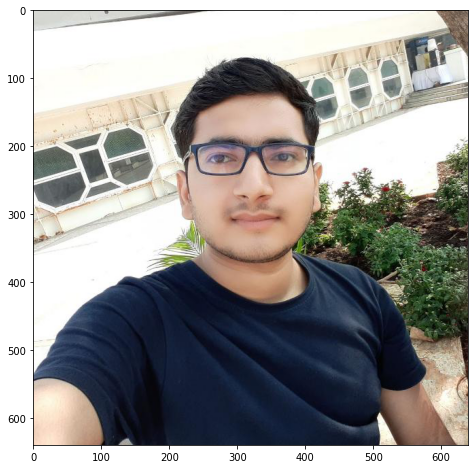

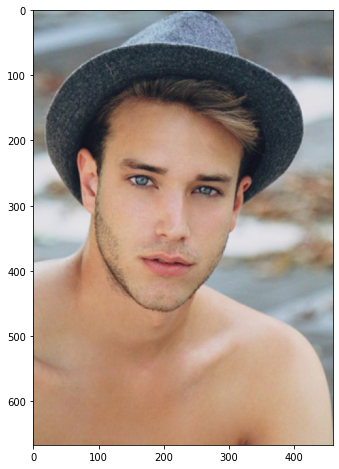

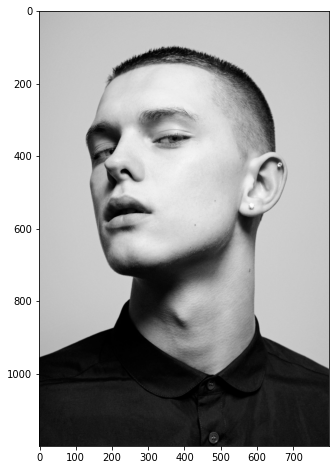

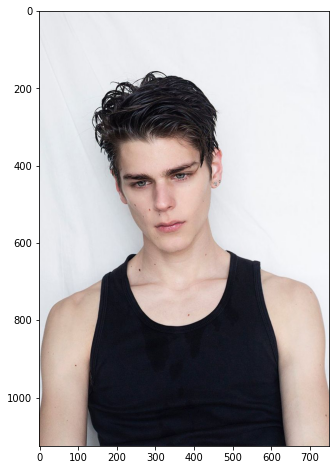

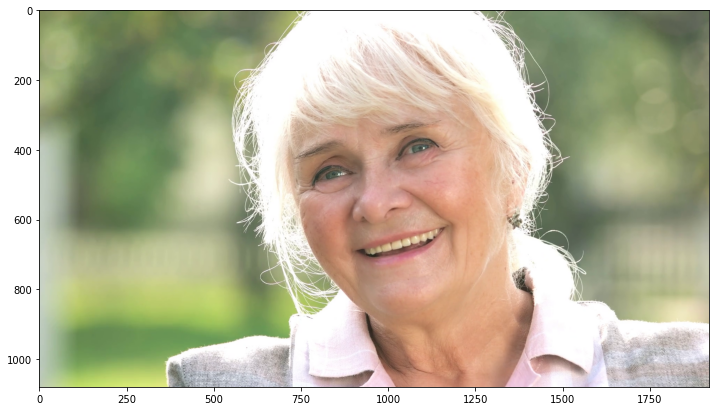

In [4]:
def getImage(img):
  return imread(folderPath + img)

def displayImage(img):
  plt.figure(figsize=[12,8])
  plt.imshow(img,cmap=plt.cm.gray)

for i in images:
  temp = getImage(i)
  displayImage(temp)

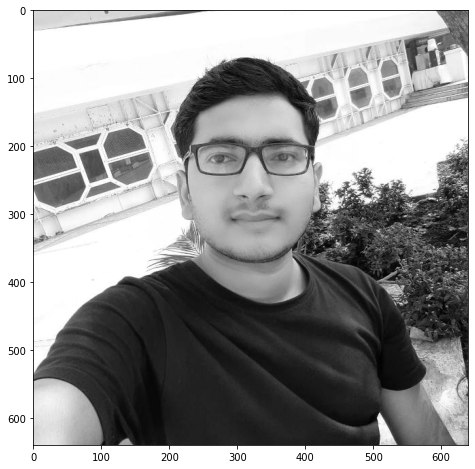

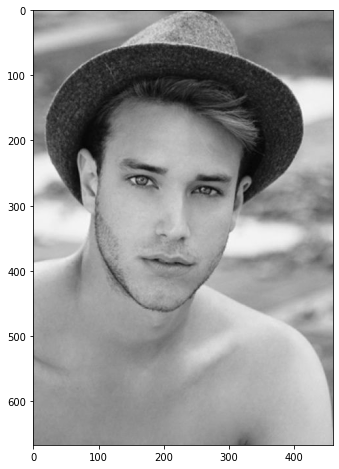

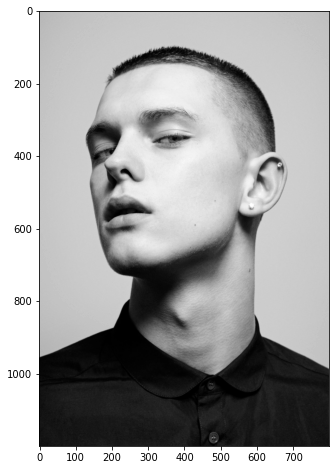

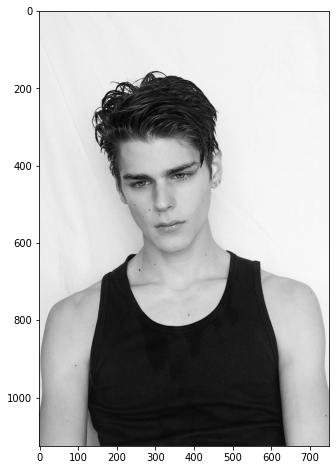

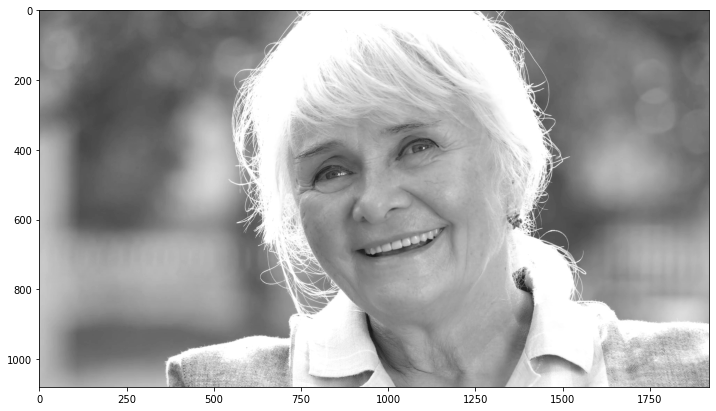

In [5]:
# make the image grayscale
def imgGray(img):
  image_sum = img.sum(axis=2)
  new_image = image_sum/image_sum.max()
  return new_image
 
grayImages = []
for i in images:
  temp = getImage(i)
  temp = imgGray(temp)
  grayImages.append(temp)
  displayImage(temp)

In [6]:
from sklearn.decomposition import PCA, IncrementalPCA

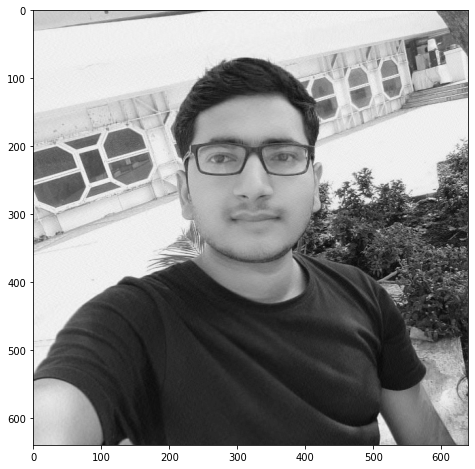

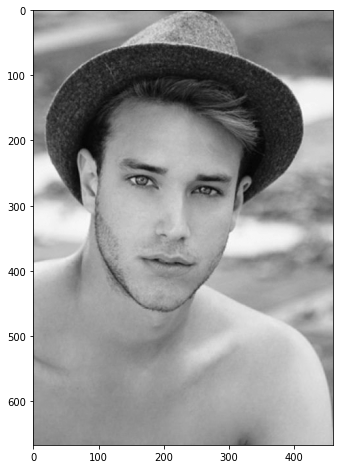

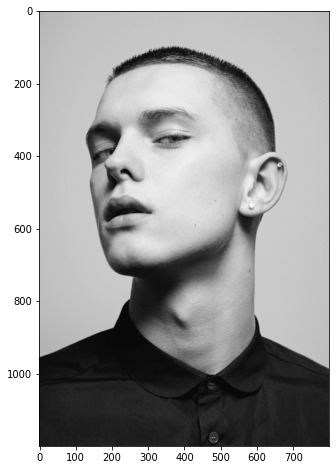

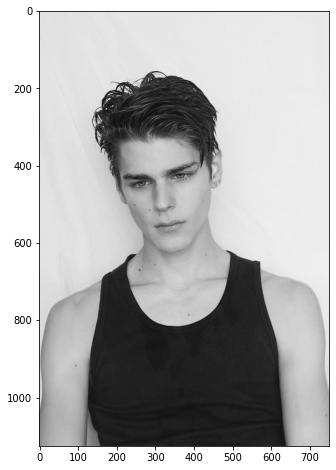

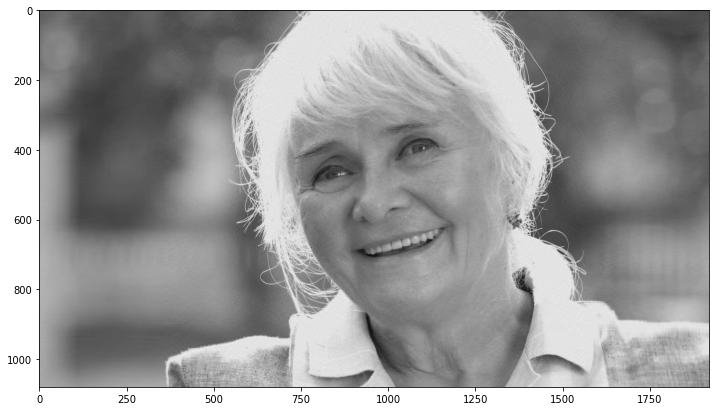

In [7]:
pcaImages = []
k = 200
for i in range(len(grayImages)):
  ipca = IncrementalPCA(n_components=k)
  image_recon = ipca.inverse_transform(ipca.fit_transform(grayImages[i]))
  pcaImages.append("pca-" + images[i])
  displayImage(image_recon)
  plt.savefig("pca-" + images[i])
  

In [8]:
for i in pcaImages:
  print(i)

pca-img-1.jpg
pca-img-2.jpg
pca-img-3.jpg
pca-img-4.jpg
pca-img-5.jpg


In [9]:
print("image size decreased list:")
for i in range(len(images)):
  temp = os.path.getsize(folderPath + images[i])
  converted = os.path.getsize(pcaImages[i])
  print(images[i],": ",temp/1000,"kb ->", converted/1000,"kb")

image size decreased list:
img-1.jpg :  63.232 kb -> 36.574 kb
img-2.jpg :  33.41 kb -> 24.374 kb
img-3.jpg :  126.833 kb -> 21.63 kb
img-4.jpg :  68.402 kb -> 20.689 kb
img-5.jpg :  2192.816 kb -> 34.321 kb
